In [1]:
import sklearn.cross_validation
import sklearn.datasets
import sklearn.metrics
import pandas as pd
import numpy as np 
from sklearn.preprocessing import LabelEncoder
from hpsklearn import estimator, components
from hyperopt import tpe


WARN: OMP_NUM_THREADS=None =>
... If you are using openblas if you are using openblas set OMP_NUM_THREADS=1 or risk subprocess calls hanging indefinitely


In [2]:
X_train = pd.read_csv('adult_train.csv',delimiter=',',header = None)
X_test = pd.read_csv('adult_test.csv',delimiter=',',header = None)

del X_train[3] #Bijection with '4'
del X_test[3]


In [3]:
temp = list(X_test[14])
for i , el in enumerate(temp) :

    temp[i] = el.replace('.','')
        
X_test[14] = temp

In [4]:
le1 = LabelEncoder()
le5 = LabelEncoder()
le6 = LabelEncoder()
le7 = LabelEncoder()
le8 = LabelEncoder()
le9 = LabelEncoder()
le13 = LabelEncoder()
le14 = LabelEncoder()

LabelEncoders = [le1, le5, le6 , le7 , le8 , le9 , le13 , le14]
categorial_features = [1,5,6,7,8,9,13,14]


for i , j in enumerate(categorial_features) : 
    
    LabelEncoders[i].fit(X_train[j])
    X_train[j] =  LabelEncoders[i].transform(X_train[j])
    X_test[j] =  LabelEncoders[i].transform(X_test[j])
    
    
y_train = X_train[14]
del X_train[14]

y_test = X_test[14]
del X_test[14]

In [5]:
estim = estimator.hyperopt_estimator(classifier=components.any_classifier('clf'),algo=tpe.suggest, trial_timeout=1000, \
                                     fit_increment = 1, fit_increment_dump_filename= 'Logfils')

In [6]:
estim.fit(np.ascontiguousarray(X_train), y_train)

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxS

In [7]:
print( estim.score( X_test, y_test ) )

0.867391437872


In [8]:
print(estim.score(X_train, y_train))

0.916218789349


In [9]:
print( estim.best_model() )

{'ex_preprocs': (), 'learner': GradientBoostingClassifier(init=None, learning_rate=0.023300927591933706,
              loss='deviance', max_depth=None, max_features='sqrt',
              max_leaf_nodes=None, min_samples_leaf=27,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=222, presort='auto', random_state=0,
              subsample=0.8895160225173608, verbose=0, warm_start=False), 'preprocs': ()}


In [30]:
estim.predict(X_test)

array([0, 0, 0, ..., 1, 0, 1])

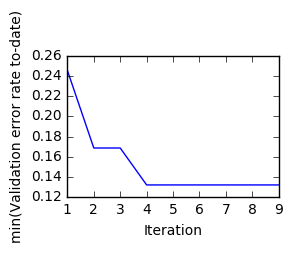

In [39]:
from hpsklearn import demo_support
import matplotlib.pyplot as plt
% matplotlib inline
fig = plt.figure()
#ax= fig.add_subplot(111)
#demo_support.scatter_error_vs_time(estim, ax)
ax2 = fig.add_subplot(222)
demo_support.plot_minvalid_vs_time(estim, ax2)
plt.savefig('adult_min_val_error.png')

In [32]:
ax2 = fig.add_subplot(222)
demo_support.plot_minvalid_vs_time(estim, ax2)

In [33]:
from sklearn.metrics import confusion_matrix

In [34]:
y = estim.predict(X_test)
cm = confusion_matrix(y_true=y_test, y_pred=y)
precision = cm[0,0]/(cm[0,0]+cm[1,0])
recall = cm[0,0]/(cm[0,0]+cm[0,1])
F = 2*(precision*recall)/(precision+recall)

In [35]:
print('Precision', precision, 'Recall', recall, 'F-measure', F)

Precision 0.893234348691 Recall 0.938560514676 F-measure 0.915336653465


In [43]:
estim.trials.trials

[{'book_time': datetime.datetime(2016, 12, 17, 11, 11, 40, 258000),
  'exp_key': None,
  'misc': {'cmd': ('domain_attachment', 'FMinIter_Domain'),
   'idxs': {'clf': [0],
    'clf.ada_boost.ada_boost_algo': [0],
    'clf.ada_boost.ada_boost_learning_rate': [0],
    'clf.ada_boost.ada_boost_n_estimators': [0],
    'clf.ada_boost.ada_boost_rstate': [0],
    'clf.extra_trees.etc_bootstrap': [],
    'clf.extra_trees.etc_criterion': [],
    'clf.extra_trees.etc_max_depth': [],
    'clf.extra_trees.etc_max_features': [],
    'clf.extra_trees.etc_max_features.frac': [],
    'clf.extra_trees.etc_min_samples_leaf': [],
    'clf.extra_trees.etc_min_samples_leaf.gt1': [],
    'clf.extra_trees.etc_n_estimators': [],
    'clf.extra_trees.etc_rstate': [],
    'clf.grad_boosting.gradient_boosting_learning_rate': [],
    'clf.grad_boosting.gradient_boosting_max_depth': [],
    'clf.grad_boosting.gradient_boosting_max_features': [],
    'clf.grad_boosting.gradient_boosting_max_features.frac': [],
    '

In [53]:
estim = estimator.hyperopt_estimator(classifier= components.knn([2,0, 2, 2]),trial_timeout=60, \
                                     fit_increment = 1, fit_increment_dump_filename= 'Logfils')

In [54]:
estim.fit(np.ascontiguousarray(X_train), y_train)

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by the normalize function.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by the

In [55]:
estim.score(X_train,y_train)

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


0.87248548877491483

In [56]:
print(estim.score(X_test, y_test))

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


0.822922424912


In [57]:
y_bis = estim.predict(X_test)

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [58]:
cm_bis = confusion_matrix(y_true=y_test, y_pred=y_bis)

In [59]:
y_bis, cm_bis

(array([0, 0, 0, ..., 1, 0, 1]), array([[11645,   790],
        [ 2093,  1753]]))

In [60]:
y-y_bis

array([0, 0, 0, ..., 0, 0, 0])

In [67]:
len(y)

16281

In [73]:
number_diff =0
for i in range(0,len(y)):
    if y[i] != y_bis[i]:
        number_diff = number_diff +1
print(number_diff)

1758
